## <h1><u>Data Science Intro - 2nd Task</u><h1>

    

    
Ophir Shurany ID: 304867716


In [1]:
from sklearn.model_selection import train_test_split
import shap
import lime
import lime.lime_tabular
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import explained_variance_score
from scipy.stats import spearmanr
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_log_error,mean_squared_error 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
plt.close('all')
import time
start_time = time.time()
# print the JS visualization code to the notebook
shap.initjs()
import time
start_time = time.time()
from imblearn.over_sampling import ADASYN, SMOTE, RandomOverSampler
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,auc,fbeta_score
from sklearn.metrics import f1_score,v_measure_score,silhouette_score
from sklearn.decomposition import PCA
from sklearn import cluster
from sklearn.cluster import KMeans,AgglomerativeClustering
from sklearn.metrics import jaccard_score,fowlkes_mallows_score,precision_recall_curve,log_loss
from sklearn.metrics.cluster import adjusted_rand_score
import matplotlib.cm as cm
sns.set()

Using TensorFlow backend.


<h1><u>Communities and Crime Data Set</u><h1>

<h2><u>Attribute Information:</u><h2>

Attribute Information: (122 predictive, 5 non-predictive, 1 goal)

In [2]:
# create dataframe
crime_data = pd.read_csv("Communities and Crime Data Set.csv", sep='|', encoding='utf8')
# Dropping the duplicates
crime_data = crime_data.drop_duplicates()
# view first 5 rows in df

In [3]:
crime_data.head().round(3)

state numeric  county numeric  community numeric  fold numeric  \
0              8             NaN                NaN             1   
1             53             NaN                NaN             1   
2             24             NaN                NaN             1   
3             34             5.0            81440.0             1   
4             42            95.0             6096.0             1   

   population numeric  householdsize numeric  racepctblack numeric  \
0                0.19                   0.33                  0.02   
1                0.00                   0.16                  0.12   
2                0.00                   0.42                  0.49   
3                0.04                   0.77                  1.00   
4                0.01                   0.55                  0.02   

   racePctWhite numeric  racePctAsian numeric  racePctHisp numeric  ...  \
0                  0.90                  0.12                 0.17  ...   
1                  0.74                  0.45                 0.07  ...   
2                  0.56                  0.17                 0.04  ...   
3                  0.08                  0.12                 0.10  ...   
4                  0.95                  0.09                 0.05  ...   

   LandArea numeric  PopDens numeric  PctUsePubTrans numeric  \
0              0.12             0.26                    0.20   
1              0.02             0.12                    0.45   
2              0.01             0.21                    0.02   
3              0.02             0.39                    0.28   
4              0.04             0.09                    0.02   

   PolicCars numeric  PolicOperBudg numeric  LemasPctPolicOnPatr numeric  \
0               0.06                   0.04                          0.9   
1                NaN                    NaN                          NaN   
2                NaN                    NaN                          NaN   
3                NaN                    NaN                          NaN   
4                NaN                    NaN                          NaN   

   LemasGangUnitDeploy numeric  LemasPctOfficDrugUn numeric  \
0                          0.5                         0.32   
1                          NaN                         0.00   
2                          NaN                         0.00   
3                          NaN                         0.00   
4                          NaN                         0.00   

   PolicBudgPerPop numeric  ViolentCrimesPerPop numeric  
0                     0.14                         0.20  
1                      NaN                         0.67  
2                      NaN                         0.43  
3                      NaN                         0.12  
4                      NaN                         0.03  

[5 rows x 127 columns]

In [4]:
new_col=[]
for col in crime_data.columns:
    new_col.append(col.replace(' numeric', ''))
crime_data.columns=new_col
#Counting the number of missing values in the dataset
print("Missing values : ",crime_data.isnull().sum().sum())

Missing values :  39202


In [5]:
# section 2.1, 2.2 , 2.3
# presenting all columns, number of rows and type
crime_data.info()
# feature statistics for numerical categories
crime_data.describe().round(3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Columns: 127 entries, state to ViolentCrimesPerPop
dtypes: float64(125), int64(2)
memory usage: 1.9 MB


state   county  community      fold  population  householdsize  \
count  1994.000  820.000    817.000  1994.000    1994.000       1994.000   
mean     28.684   58.827  46188.337     5.494       0.058          0.463   
std      16.398  126.421  25299.727     2.874       0.127          0.164   
min       1.000    1.000     70.000     1.000       0.000          0.000   
25%      12.000    9.000  25065.000     3.000       0.010          0.350   
50%      34.000   23.000  48090.000     5.000       0.020          0.440   
75%      42.000   59.500  66660.000     8.000       0.050          0.540   
max      56.000  840.000  94597.000    10.000       1.000          1.000   

       racepctblack  racePctWhite  racePctAsian  racePctHisp  ...  LandArea  \
count      1994.000      1994.000      1994.000     1994.000  ...  1994.000   
mean          0.180         0.754         0.154        0.144  ...     0.065   
std           0.253         0.244         0.209        0.232  ...     0.109   
min           0.000         0.000         0.000        0.000  ...     0.000   
25%           0.020         0.630         0.040        0.010  ...     0.020   
50%           0.060         0.850         0.070        0.040  ...     0.040   
75%           0.230         0.940         0.170        0.160  ...     0.070   
max           1.000         1.000         1.000        1.000  ...     1.000   

        PopDens  PctUsePubTrans  PolicCars  PolicOperBudg  \
count  1994.000        1994.000    319.000        319.000   
mean      0.233           0.162      0.163          0.077   
std       0.203           0.229      0.215          0.140   
min       0.000           0.000      0.000          0.000   
25%       0.100           0.020      0.040          0.020   
50%       0.170           0.070      0.080          0.030   
75%       0.280           0.190      0.195          0.060   
max       1.000           1.000      1.000          1.000   

       LemasPctPolicOnPatr  LemasGangUnitDeploy  LemasPctOfficDrugUn  \
count              319.000              319.000             1994.000   
mean                 0.699                0.440                0.094   
std                  0.214                0.406                0.240   
min                  0.000                0.000                0.000   
25%                  0.620                0.000                0.000   
50%                  0.750                0.500                0.000   
75%                  0.840                1.000                0.000   
max                  1.000                1.000                1.000   

       PolicBudgPerPop  ViolentCrimesPerPop  
count          319.000             1994.000  
mean             0.195                0.238  
std              0.165                0.233  
min              0.000                0.000  
25%              0.110                0.070  
50%              0.150                0.150  
75%              0.220                0.330  
max              1.000                1.000  

[8 rows x 127 columns]

In [6]:
#Imputing the missing values with the mean value for each column using fillna()
crime_data.fillna(crime_data.mean(), inplace=True)
print("Missing values after Imputing : ",crime_data.isnull().sum().sum())
#Examining the Predictors and the Response Variable Per Capita Violent Crimes
#We can see that most of the columns have minimum value of Zero which indicates a Missing value

Missing values after Imputing :  0


-- state: US state (by number) - not counted as predictive above, but if considered, should be consided nominal (nominal)

-- county: numeric code for county - not predictive, and many missing values (numeric)

-- community: numeric code for community - not predictive and many missing values (numeric)

-- fold: fold number for non-random 10 fold cross validation, potentially useful for debugging, paired tests - not predictive (numeric)

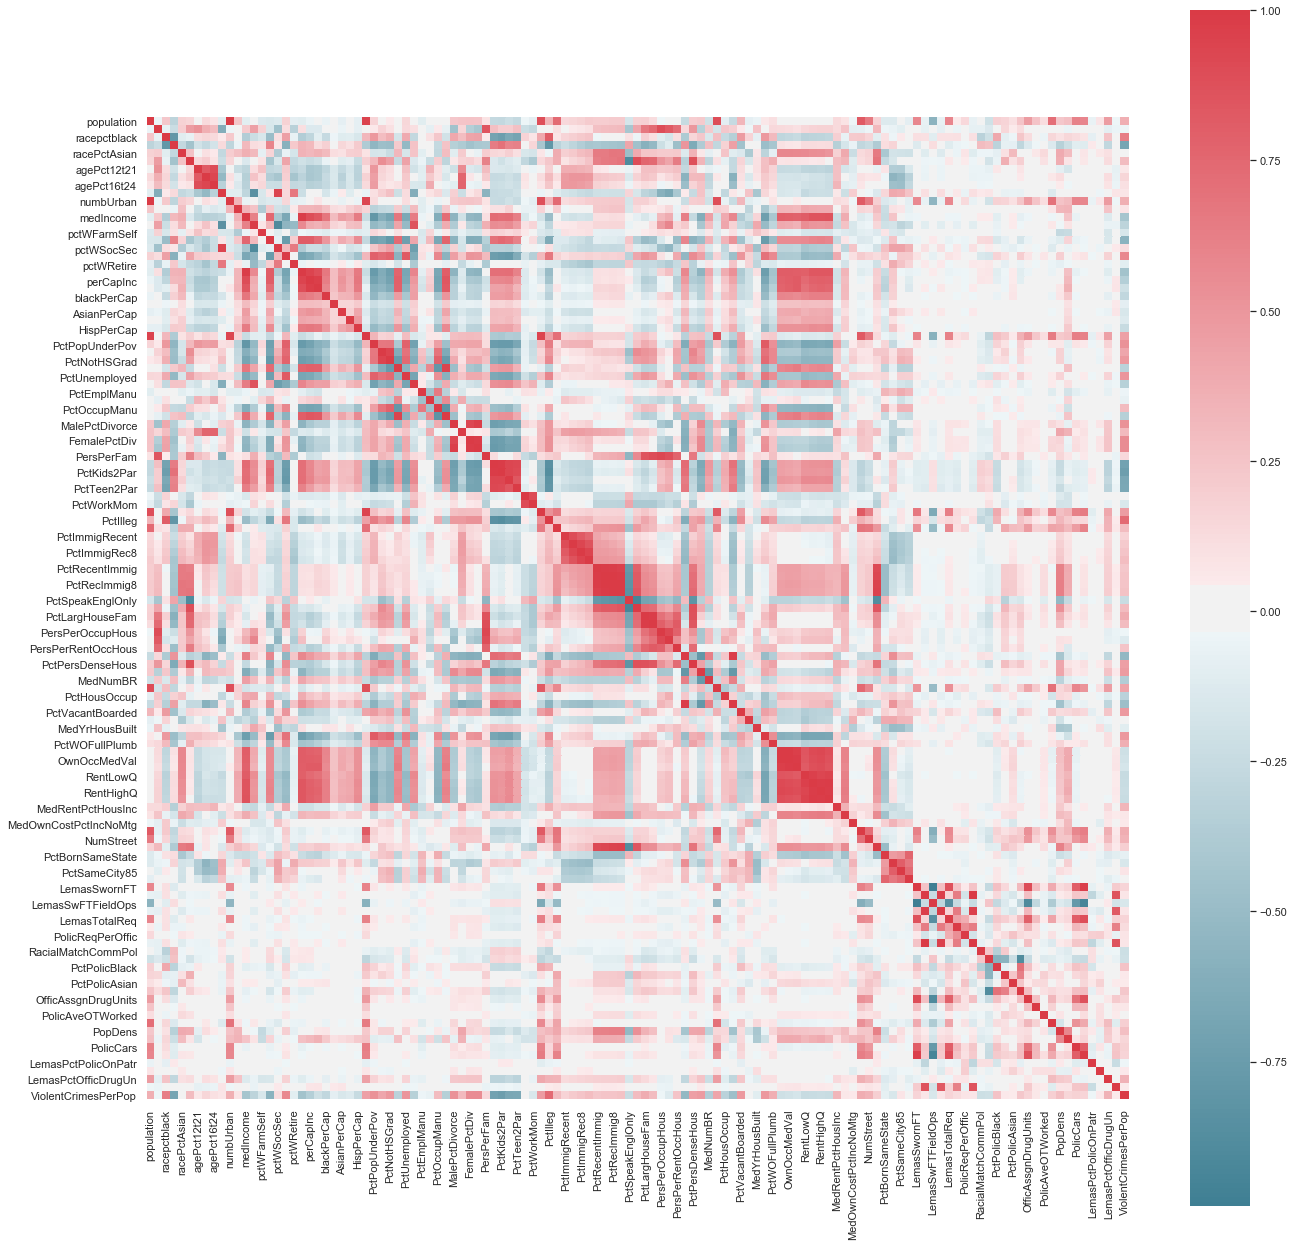

In [7]:
crime_data=crime_data.drop(['state','county','community','fold'],axis=1)
corr = crime_data.corr()
f, ax = plt.subplots(figsize=(22, 22))
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [8]:
cols = list(crime_data.columns)
features = cols
features.remove(crime_data.columns[-1])
X=crime_data[features]
X = pd.DataFrame(StandardScaler().fit_transform(X),columns=features)
y=crime_data[crime_data.columns[-1]]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [10]:
kfold = KFold()
model = RandomForestRegressor()
#explore the hyperparameters
print(model.get_params())
# Number of trees in random forest
n_estimators = [100, 200, 400]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [3,4,5,None]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
#learning rate shrinks the contribution of each tree by learning_rate.
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)
#search across 100 different combinations, and use all available cores
model_random = RandomizedSearchCV(estimator = model,
                                param_distributions = random_grid,
                                n_iter = 50, cv = kfold, verbose=2,
                                random_state=0, n_jobs = -1)
model_best=model_random.fit(X_train, y_train.values.ravel())
model_best.best_params_
predictions_model =model_best.predict(X_test)

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
{'n_estimators': [100, 200, 400], 'max_features': ['auto', 'sqrt'], 'max_depth': [3, 4, 5, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}
Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   42.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  4.8min finished


In [11]:
model_best=RandomForestRegressor().set_params(**model_best.best_params_)
model_best.fit(X_train, y_train.values.ravel())
print("Best r2 score: " +str(round(model_best.score(X_train, y_train),3)))
print("variance score: " +str(round(explained_variance_score(y_test, predictions_model),2)))

Best r2 score: 0.929
variance score: 0.66


Text(0, 0.5, 'predicted')

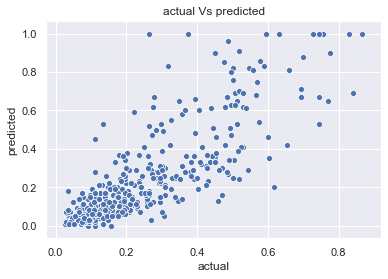

In [12]:
sns.scatterplot(x=predictions_model, y=y_test)
plt.title('actual Vs predicted')
# Set x-axis label
plt.xlabel('actual')
# Set y-axis label
plt.ylabel('predicted')

We now take a look at the distribution of errors (i.e. the residuals).

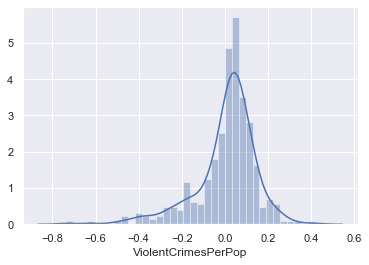

In [13]:
error = predictions_model - y_test
sns.distplot(error)

<h2><u>SHAP</u><h2>

In [14]:
shap_values = shap.TreeExplainer(model_best).shap_values(X_train)

The SHAP values can show how much each predictor contributes, either positively or negatively, to the target variable. 

This is like the variable importance plot but it is able to show the positive or negative relationship for each variable with the target

 <h2><u>Global interpretability</u><h2>

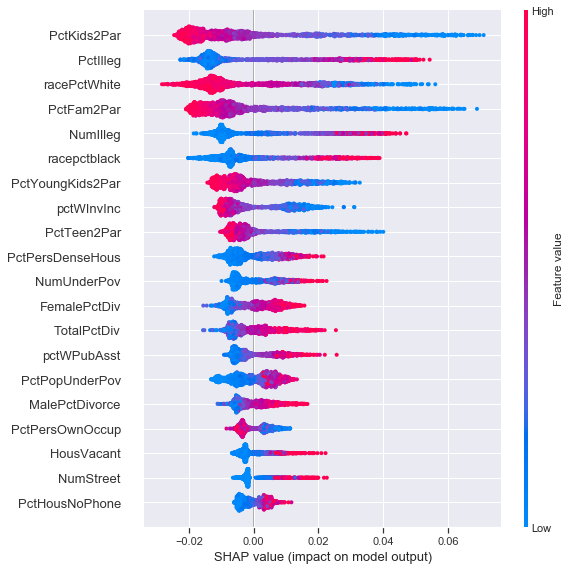

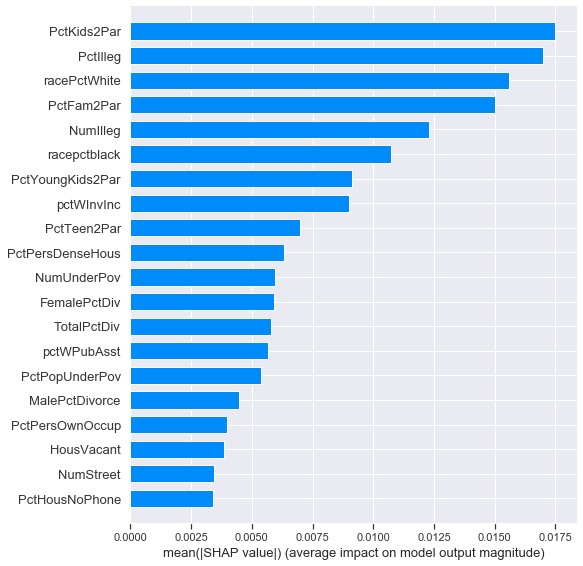

In [15]:
shap.summary_plot(shap_values, X_train)
shap.summary_plot(shap_values, X_train,plot_type="bar")

In [16]:
shap_sum = np.abs(shap_values).mean(axis=0)
importance_df = pd.DataFrame([X_train.columns.tolist(), shap_sum.tolist()]).T
importance_df.columns = ['column_name', 'shap_importance']
importance_df = importance_df.sort_values('shap_importance', ascending=False)
importance_df

column_name shap_importance
44           PctKids2Par       0.0174999
50              PctIlleg       0.0169837
3           racePctWhite       0.0155919
43            PctFam2Par       0.0150184
49              NumIlleg       0.0123058
..                   ...             ...
110  OfficAssgnDrugUnits      0.00014724
108        PctPolicAsian     0.000127652
70              MedNumBR     0.000123575
107         PctPolicHisp     0.000116284
112     PolicAveOTWorked     9.91933e-05

[122 rows x 2 columns]

 The top 3 explainable  variable are - 
 
1.PctIlleg numeric -  percentage of kids born to never married (numeric - decimal)
this variable  is a positively correlated with the target variable (color red).
We were not have surprised by this result because families with married parents seems to have more
"comfort environment" for rise children.  

2.PctKids2Par numeric - percentage of kids in family housing with two parents (numeric - decimal)
this variable  is a negatively correlated with the target variable (color blue).
we think this result is reasonable :- for Example a mother in a single-parent family ned to find time 
for working, educate the the child and more. Unfortunately a single mom will hot have much time to \
spend with her boy.

3.racePctWhite: percentage of population that is caucasian 
Because it is the "weakest" variable among the top 3 we would make another analyses about it: 

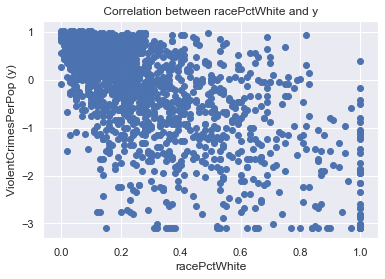

In [17]:
plt.scatter(y, X["racePctWhite"])
plt.xlabel('racePctWhite')
plt.ylabel('ViolentCrimesPerPop (y)')
plt.title(' Correlation between racePctWhite and y ')
plt.show()

In [18]:
from scipy.stats import spearmanr

coef, p = spearmanr(y, X["racePctWhite"])
print('Spearmans correlation coefficient: %.3f' % coef)
print('p: ', p)
alpha = 0.05
if p > alpha:
    print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
    print('Samples are correlated (reject H0) p=%.3f' % p)

Spearmans correlation coefficient: -0.697
p:  2.011767866134938e-290
Samples are correlated (reject H0) p=0.000


According to the SHAP values and the other tests that we have done we can see that racePctWhite can 
effect the results(y).

 <h2><u>Local interpretability</u><h2>

In [19]:
y_predict=pd.DataFrame(predictions_model,columns=['ViolentCrimesPerPop'])
df_local = pd.concat([X_test,y_predict], axis=1).dropna()
df_local_samp=df_local.sample(n=3, random_state=1)

In [20]:
def shap_plot(j):
    explainerModel = shap.TreeExplainer(model_best)
    shap_values_Model = explainerModel.shap_values(df_local_samp)
    p = shap.force_plot(explainerModel.expected_value, shap_values_Model[j], df_local.iloc[[j]])
    return(p)

-The output value is the prediction for that observation

-The base value is the value that would be predicted if we did not know any features for the current output.” In other words, it is the mean prediction

-Red/blue: Features that push the prediction higher (to the right) are shown in red, and those pushing the prediction lower are in blue.

In [21]:
shap_plot(0)

PctKids2Par: has positive impact on the output. racepctblack  is -1.6513 which is higher than the average value 1.65125. So it pushes the prediction to the right.
racepctwhite: has a negative impact on the output. A lower than the average racepctwhite drives the prediction to the right.

In [22]:
shap_plot(1)

NumIlleg: is positively related to the output. A lower than the average NumIlleg pushes the prediction to the left.
racepctwhite: has positive impact on the output, higher than the average value So it pushes the prediction to the right.

In [23]:
shap_plot(2)

all three major impact features are positively related to the output. lowers than their averages, each of them pushes the prediction to the left.

<h2><u>LIME</u><h2>

Intercept 0.27841987358648207
Prediction_local [0.31579966]
Right: 0.261548521825397
---------------


---------------
---------------
Intercept 0.30667531263356307
Prediction_local [0.22783151]
Right: 0.05755532196969696
---------------


---------------
---------------
Intercept 0.2544867917591254
Prediction_local [0.3849882]
Right: 0.6087318849206348
---------------


---------------
---------------


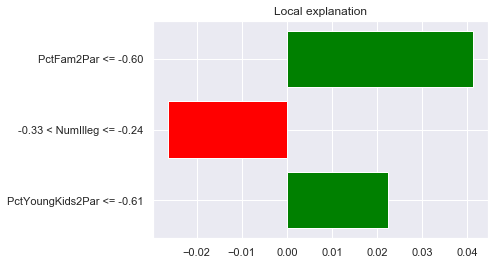

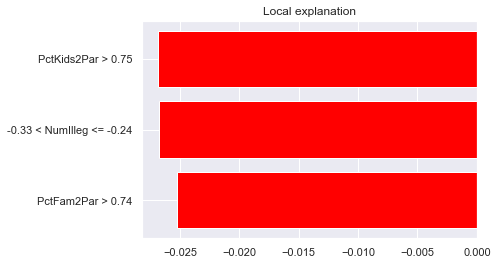

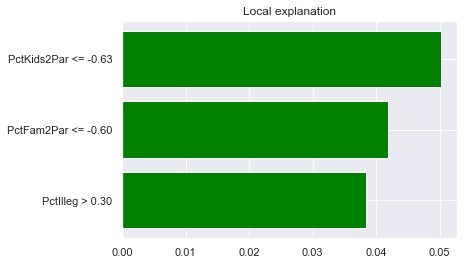

In [24]:
import lime
import lime.lime_tabular
explainer = lime.lime_tabular.LimeTabularExplainer(np.array(X_train),
                    feature_names=X.columns, 
                    class_names=['ViolentCrimesPerPop'],                          
                    verbose=True, mode='regression')
for i in df_local_samp.index:    
    exp = explainer.explain_instance(X_test.iloc[i], model_best.predict,num_features=3)
    exp.as_pyplot_figure()
    print("---------------")
    exp.show_in_notebook(show_table=True, show_all=True)
    print("---------------")
    print("---------------")

<h2><u>Conclusion</u><h2>
    
- The base value in SHAP is 0.237, in LIME it shifted between 0.213 to 0.37
- The main feature that has been selected in both SHAP and LIME is PctKids2Par.
    
Shapley value guarantees a fair distribution of contribution for each of the variables (LIME do not provide the guarantee). LIME assumes that the local model is linear, SHAP does not have any such assumptions. SHAP value calculation is very time expensive (as it checks all the possible combinations: it does it through monte Carlo simulations rather than brute force). SHAP value is NOT the difference between the prediction with and without a variable, rather it is a contribution of a variable to the difference between the actual prediction and the mean prediction.

## <h1><u>HTRU 2</u><h1>

The data set shared here contains 16,259 spurious examples caused by RFI/noise, and 1,639 real pulsar examples. These examples have all been checked by human annotators.

Attribute Information:

Each candidate is described by 8 continuous variables, and a single class variable. The first four are simple statistics obtained from the integrated pulse profile . This is an array of continuous variables that describe a longitude-resolved version of the signal that has been averaged in both time and frequency. The remaining four variables are similarly obtained from the DM-SNR curve. These are summarised below:

1. Mean of the integrated profile.
2. Standard deviation of the integrated profile.
3. Excess kurtosis of the integrated profile.
4. Skewness of the integrated profile.
5. Mean of the DM-SNR curve.
6. Standard deviation of the DM-SNR curve.
7. Excess kurtosis of the DM-SNR curve.
8. Skewness of the DM-SNR curve.
9. Class

[HTRU 2 Summary](https://archive.ics.uci.edu/ml/datasets/HTRU2#)

17,898 total examples.

1,639 positive examples.

16,259 negative examples.

<h2><u>Imbalanced dataset predictions models</u><h2>

    1. Random Under Sampling
    2. Random Over Sampling
    3. SMOTE
    4. ADASYN
    5. Combine approach 
more info can be explained in [this link](https://en.wikipedia.org/wiki/Oversampling_and_undersampling_in_data_analysis)

In [25]:
#%% Create dataframe
data = pd.read_csv("pulsar_stars.csv")
#view first 5 rows in df
data.head()
#presenting all columns, number of rows and type
data.info()
#feature statistics for numerical categories
data.describe().round(2)
#Majority class is 0 (Not a pulsar)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                17898 non-null  float64
 1    Standard deviation of the integrated profile  17898 non-null  float64
 2    Excess kurtosis of the integrated profile     17898 non-null  float64
 3    Skewness of the integrated profile            17898 non-null  float64
 4    Mean of the DM-SNR curve                      17898 non-null  float64
 5    Standard deviation of the DM-SNR curve        17898 non-null  float64
 6    Excess kurtosis of the DM-SNR curve           17898 non-null  float64
 7    Skewness of the DM-SNR curve                  17898 non-null  float64
 8   target_class                                   17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


Mean of the integrated profile  \
count                         17898.00   
mean                            111.08   
std                              25.65   
min                               5.81   
25%                             100.93   
50%                             115.08   
75%                             127.09   
max                             192.62   

        Standard deviation of the integrated profile  \
count                                       17898.00   
mean                                           46.55   
std                                             6.84   
min                                            24.77   
25%                                            42.38   
50%                                            46.95   
75%                                            51.02   
max                                            98.78   

        Excess kurtosis of the integrated profile  \
count                                    17898.00   
mean                                         0.48   
std                                          1.06   
min                                         -1.88   
25%                                          0.03   
50%                                          0.22   
75%                                          0.47   
max                                          8.07   

        Skewness of the integrated profile   Mean of the DM-SNR curve  \
count                             17898.00                   17898.00   
mean                                  1.77                      12.61   
std                                   6.17                      29.47   
min                                  -1.79                       0.21   
25%                                  -0.19                       1.92   
50%                                   0.20                       2.80   
75%                                   0.93                       5.46   
max                                  68.10                     223.39   

        Standard deviation of the DM-SNR curve  \
count                                 17898.00   
mean                                     26.33   
std                                      19.47   
min                                       7.37   
25%                                      14.44   
50%                                      18.46   
75%                                      28.43   
max                                     110.64   

        Excess kurtosis of the DM-SNR curve   Skewness of the DM-SNR curve  \
count                              17898.00                       17898.00   
mean                                   8.30                         104.86   
std                                    4.51                         106.51   
min                                   -3.14                          -1.98   
25%                                    5.78                          34.96   
50%                                    8.43                          83.06   
75%                                   10.70                         139.31   
max                                   34.54                        1191.00   

       target_class  
count      17898.00  
mean           0.09  
std            0.29  
min            0.00  
25%            0.00  
50%            0.00  
75%            0.00  
max            1.00

In [26]:
cols = list(data.columns)
features = cols
features.remove('target_class')
# Normalization
X=data[features]
X = StandardScaler().fit_transform(X)
Y=data.target_class
#For this classification problem, I choose KNN 3 neighbors. 
model = KNeighborsClassifier(n_neighbors=3)

- Dummysampler is for measuring cross validation of the unbalanced data
- The Combine approach is called SMOTETomek, a class thats performs over-sampling using SMOTE and cleaning using Tomek links

In [27]:
class DummySampler:
    def sample(self, X, y):
        return X, y
    def fit(self, X, y):
        return self
    def fit_resample(self, X, y):
        return self.sample(X, y)
# prepare samplers
RUS=RandomUnderSampler()
ADASYN=ADASYN()
ROS= RandomOverSampler()
SMOTE=SMOTE()
Combine=SMOTETomek()
Samplers = []
Samplers.append(('Original', DummySampler()))
Samplers.append(('RUS', RUS))
Samplers.append(('ROS', ROS))
Samplers.append(('ADASYN', ADASYN))
Samplers.append(('SMOTE', SMOTE))
Samplers.append(('Combine', Combine))

The very simple metric to measure classification is basic accuracy i.e. ratio of correct predictions to the total number of samples in dataset. However, in the case of imbalanced classes this metric can be misguiding, as high metrics doesn’t show prediction capacity for the minority class.

I will now compare the results of the different models on the validation set using the following models:
- Accuracy*
- [F-Measure](https://en.wikipedia.org/wiki/F1_score)
- Precision
- Recall
- [ROC-AUC](https://en.wikipedia.org/wiki/Receiver_operating_characteristic)

*Precision is an unsuitable measure of this problem, below I will explain the reasons why



****************accuracy**************
-----------Original---------
The number of samples in  Original  dataset is 17898
0    16259
1     1639
Name: target_class, dtype: int64
Ratio samples in  Original  dataset target values is 0.101
cross validation score -  Original: 0.978212 (0.011018)
-----------RUS---------
The number of samples in  RUS  dataset is 3278
1    1639
0    1639
Name: target_class, dtype: int64
Ratio samples in  RUS  dataset target values is 1.0
cross validation score -  RUS: 0.920549 (0.051466)
-----------ROS---------
The number of samples in  ROS  dataset is 32518
1    16259
0    16259
Name: target_class, dtype: int64
Ratio samples in  ROS  dataset target values is 1.0
cross validation score -  ROS: 0.939105 (0.012628)
-----------ADASYN---------
The number of samples in  ADASYN  dataset is 32378
0    16259
1    16119
Name: target_class, dtype: int64
Ratio samples in  ADASYN  dataset target values is 0.991
cross validation score -  ADASYN: 0.891606 (0.012789)
--------

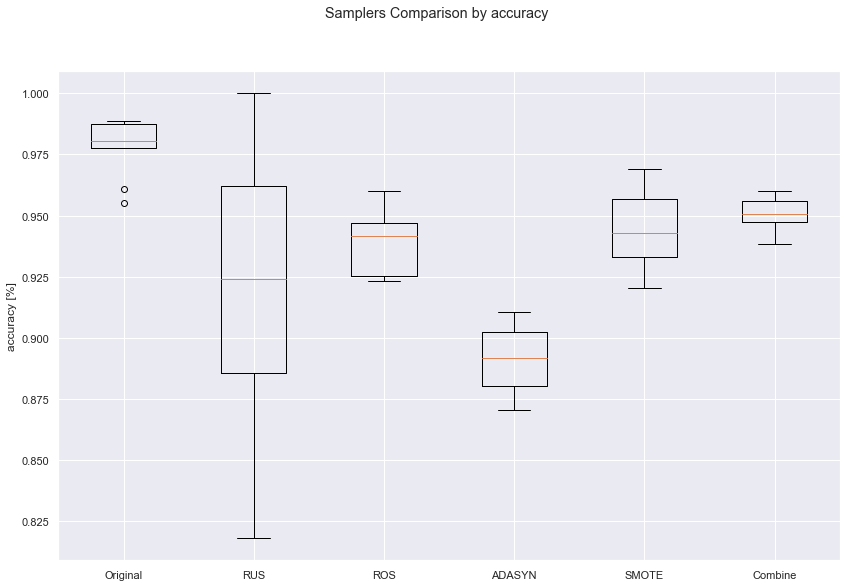

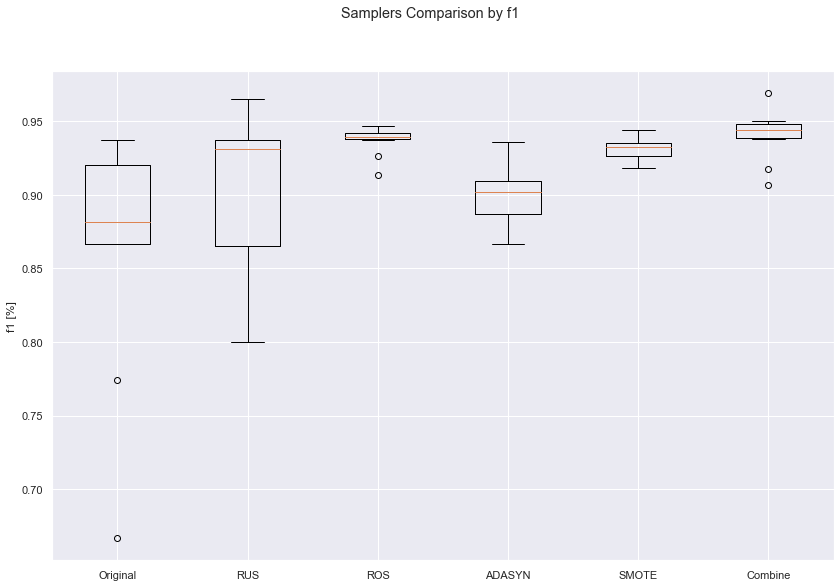

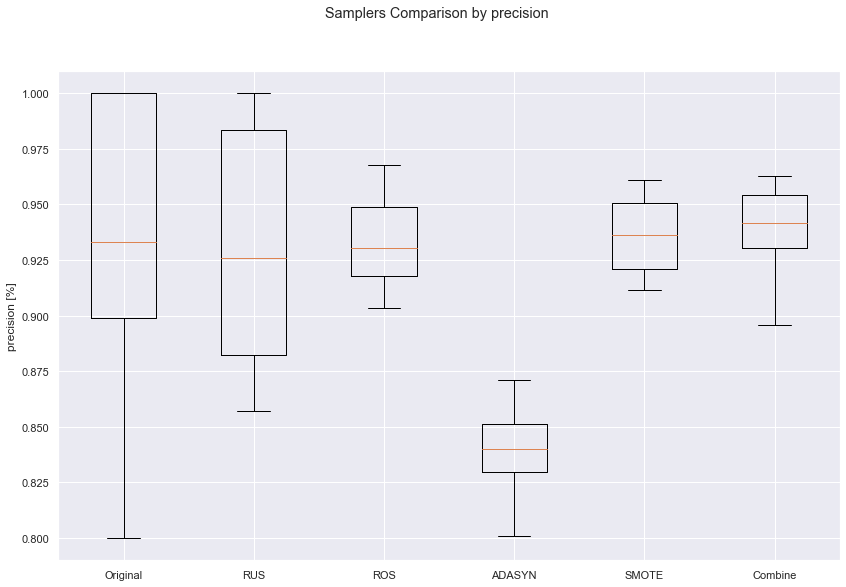

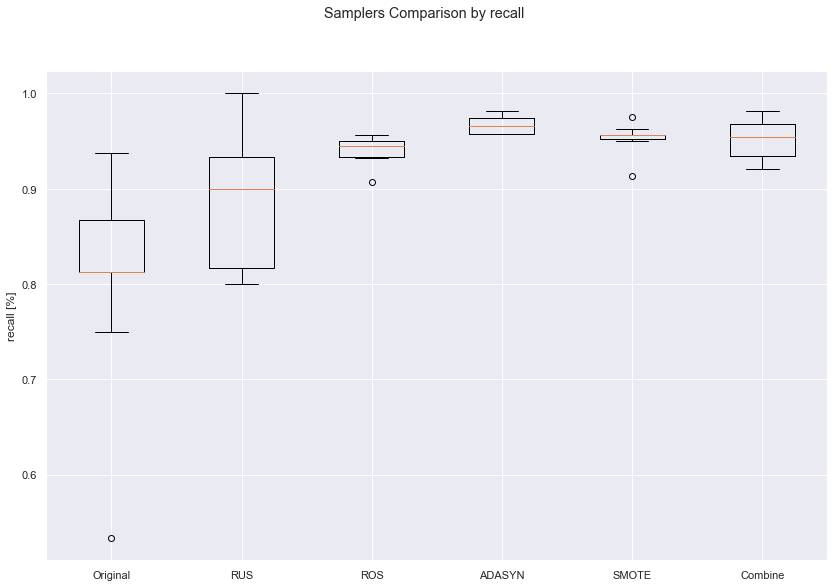

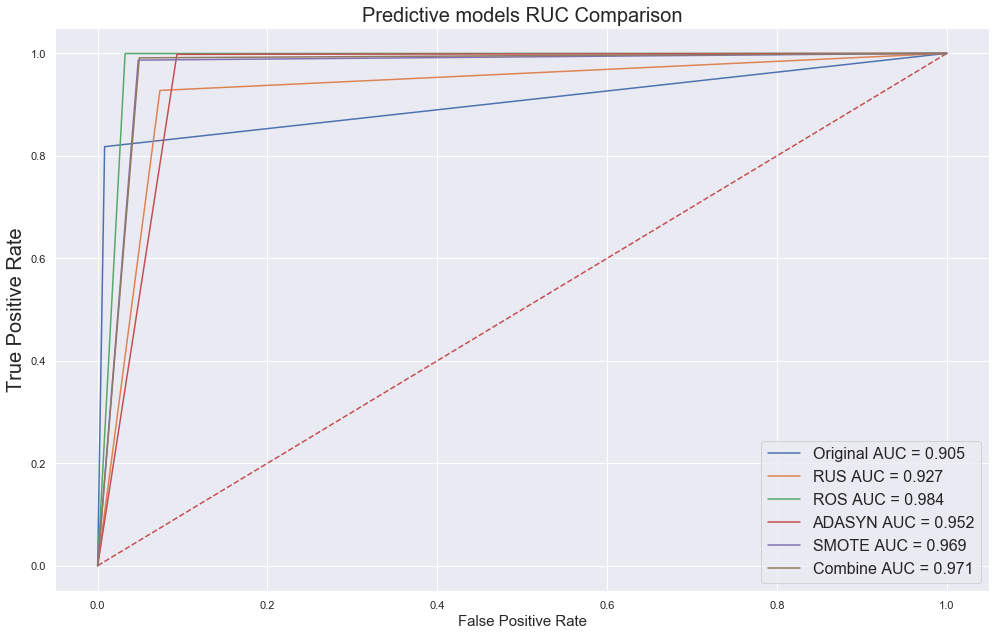

In [28]:
# evaluate each sampler in turn
score = ['accuracy', 'f1',"precision","recall"] #Different measures
RANDOM_STATE=0
for scoring in score:
    print("****************"+scoring+"**************")
    results = []
    names = []
    predictions=[]
    f1_score_tot=[];f2_score_tot=[]
    fpr_tot=[];tpr_tot=[];roc_auc_tot=[]
    for name, sampler in Samplers:
        print("-----------"+name+"---------")
        X_sampled, Y_sampled = sampler.fit_resample(X,Y)
        print("The number of samples in ",name," dataset is" ,X_sampled.shape[0])
        print(Y_sampled.value_counts())
        print("Ratio samples in ",name," dataset target values is",round(Y_sampled.value_counts()[1]/Y_sampled.value_counts()[0],3))
#Now I will randomly split the data so that 10% is saved for validation and 90% for training and test
        X_train_test, X_val, Y_train_test, Y_val =train_test_split(X_sampled, Y_sampled, test_size=0.1, random_state=42)
        X_train, X_test, y_train, y_test = train_test_split(X_train_test, Y_train_test, test_size=0.2, random_state=42)

        cv_results = cross_val_score(model, X_val, Y_val,cv=10, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print("cross validation score - ",msg)
        
        model.fit(X_train, y_train)
        y_pred=model.predict(X_test)
        predictions.append(y_pred)
        probs= model.predict_proba(X_test)
        preds = probs[:,1]
        #F2 score
        f1_measure=f1_score(y_test, y_pred)
        f1_score_tot.append(f1_measure)
        f2_score=fbeta_score(y_test, y_pred, beta=2)
        f2_score_tot.append(f2_score)
        #ROC-AUC
        fpr, tpr, threshold = roc_curve(y_test, y_pred)
        roc_auc = auc(fpr, tpr)
        fpr_tot.append(fpr);tpr_tot.append(tpr);roc_auc_tot.append(roc_auc)
#    print(classification_report(y_test, model.predict(X_test),target_names=["no","yes"]))
#    CM=confusion_matrix(y_test, y_pred)
#    print(pd.DataFrame(CM, index = ["Predicted No","Predicted Yes"],
#              columns = ["Actual No","Actual Yes"]))
    # boxplot algorithm comparison
    fig1 = plt.figure(figsize=(14, 9))
    plt.tight_layout()
    fig1.suptitle('Samplers Comparison by '+scoring)
    ax1 = fig1.add_subplot(111)
    plt.boxplot(results)
    ax1.set_xticklabels(names)
    ax1.set_ylabel(scoring+" [%]")

plt.figure(figsize=(14, 9))
plt.plot([0, 1], [0, 1],'r--')
plt.title('Predictive models RUC Comparison',fontsize=20)
plt.ylabel('True Positive Rate',fontsize=20)
plt.xlabel('False Positive Rate',fontsize=15)
plt.tight_layout()
for i in range(len(names)):
    plt.plot(fpr_tot[i], tpr_tot[i], label = names[i]+' AUC = %0.3f' % roc_auc_tot[i])
    plt.legend(loc = 'lower right', prop={'size': 16})

Samplers comparison by accuracy:
As mention before, the accuracy of unbalanced data (Original) has very high accuracy, compare to balanced datasets, but also has a very low values at F1 measure, mainly because low recall (can be seen in boxplot 4 **"Samplers comparison by recall"**)

For any $\beta$ score the equation is: $$ F_\beta = (1+\beta^2)\cdot \frac{precision \cdot recall}{(\beta^2 \cdot precision) + recall}\equiv  \frac{(1+\beta^2)\cdot True Positive}{(1+\beta^2)\cdot True Positive+\beta^2 \cdot False Negative + False Positive}  $$

for F2, $\beta = 2 $, and so $$ F_2 = 5\cdot \frac{precision \cdot recall}{(4 \cdot precision) + recall}\equiv  \frac{5\cdot True Positive}{5\cdot True Positive+4 \cdot False Negative + False Positive}  $$
It can be seen that F2 measure weighs recall higher than precision (by placing more emphasis on false negatives). 
This makes the F2 score more suitable in certain applications where it’s more important to classify correctly as many positive samples as possible, rather than maximizing the number of correct classifications, as in our case.

In [29]:
(pd.DataFrame(list(zip(f1_score_tot,f2_score_tot)),columns =['F1 measure', 'F2 measure'],index=names) .T).round(3)

Original    RUS    ROS  ADASYN  SMOTE  Combine
F1 measure     0.861  0.926  0.984   0.956   0.97    0.972
F2 measure     0.835  0.927  0.993   0.981   0.98    0.984

As a conclusion I would recommend to use accuracy only if the classes are perfectly balanced, and otherwise use F2 and ROC-AUC. It is also useful to see ratio of positives and negative estimation via precision and recall.

<h2><u>Clustering the  original dataset<u><h2>

In [30]:
#%% Create dataframe
data = pd.read_csv("pulsar_stars.csv")
#view first 5 rows in df
data.head()

Mean of the integrated profile  \
0                       140.562500   
1                       102.507812   
2                       103.015625   
3                       136.750000   
4                        88.726562   

    Standard deviation of the integrated profile  \
0                                      55.683782   
1                                      58.882430   
2                                      39.341649   
3                                      57.178449   
4                                      40.672225   

    Excess kurtosis of the integrated profile  \
0                                   -0.234571   
1                                    0.465318   
2                                    0.323328   
3                                   -0.068415   
4                                    0.600866   

    Skewness of the integrated profile   Mean of the DM-SNR curve  \
0                            -0.699648                   3.199833   
1                            -0.515088                   1.677258   
2                             1.051164                   3.121237   
3                            -0.636238                   3.642977   
4                             1.123492                   1.178930   

    Standard deviation of the DM-SNR curve  \
0                                19.110426   
1                                14.860146   
2                                21.744669   
3                                20.959280   
4                                11.468720   

    Excess kurtosis of the DM-SNR curve   Skewness of the DM-SNR curve  \
0                              7.975532                      74.242225   
1                             10.576487                     127.393580   
2                              7.735822                      63.171909   
3                              6.896499                      53.593661   
4                             14.269573                     252.567306   

   target_class  
0             0  
1             0  
2             0  
3             0  
4             0

We would for first part of our implementation, treat it as a unlabelled dataset and try to run clustering algorithms to find out the distinct group of data points namely:

1. [PCA](https://en.wikipedia.org/wiki/Principal_component_analysis\)
2. [Agglomerative Clustering](https://en.wikipedia.org/wiki/Hierarchical_clustering)
3. [KMeans](https://en.wikipedia.org/wiki/K-means_clustering)

PCA - Principal Component Analysis
It is a precursor step to any analysis that we may subject to our dataset. The above dataset has decent dimensional feature space consisting of 8 features. In such a high-dimensional space, Euclidean distances tend to become inflated and meaningless. This can severely impact our algorithms performance. Such a situation demands more data to train our model and this problem is called the 'Curse of Dimensionality'.

The PCA algorithm solves this problem by finding out the features that explain the maximum variance. So, instead of training our models over 8 features we will be training them over 2 features that explain the maximum variance.

 Together, the two components contain 78.0 % of the information


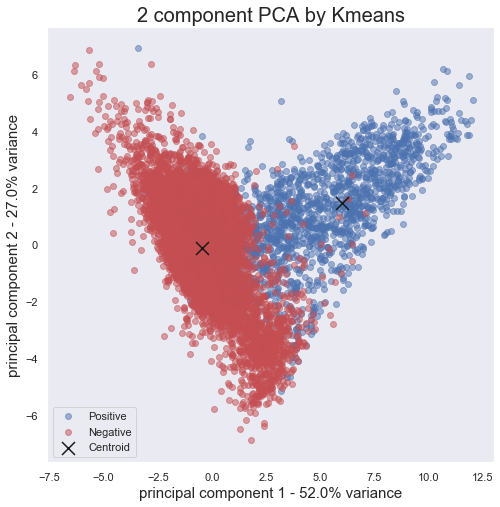

In [31]:
cols = list(data.columns)
features = cols
features.remove('target_class')
# Normalization
X=data[features]
X = StandardScaler().fit_transform(X)
Y=data.target_class
# Split dataset to 60% training and 40% testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=0)
# First we reduce the data to two dimensions using PCA to capture variation
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(X)
#print(reduced_data[:10])  # print upto 10 elements
reduced_data.shape
principalDf = pd.DataFrame(data = reduced_data, columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, data[['target_class']]], axis = 1)
fig = plt.figure(figsize = (8,8))
PCA1='principal component 1 - '+str(100*round(pca.explained_variance_ratio_[0],2))+"% variance"
PCA2='principal component 2 - '+str(100*round(pca.explained_variance_ratio_[1],2))+"% variance"
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel(PCA1, fontsize = 15)
ax.set_ylabel(PCA2, fontsize = 15)
ax.set_title('2 component PCA by Kmeans', fontsize = 20)
targets = [1,0]
colors = ['b', 'r']
pca.explained_variance_ratio_
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target_class'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color,alpha=0.5)
ax.grid()
kmeans = cluster.KMeans(n_clusters=2)
kmeans.fit(reduced_data)
centroids = kmeans.cluster_centers_
ax.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='k', zorder=10)
ax.legend(["Positive","Negative","Centroid"])
print(" Together, the two components contain",str(100*round(sum(pca.explained_variance_ratio_),2)),"% of the information")

[Average silhouette method](https://en.wikipedia.org/wiki/Silhouette_(clustering)) computes the average silhouette of observations for different values of k. The optimal number of clusters k is the one that maximize the average silhouette over a range of possible values for k.

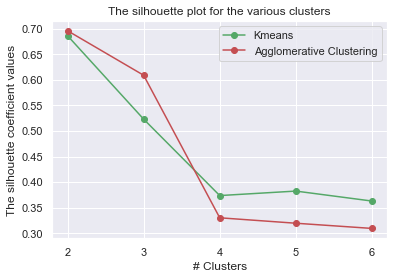

In [32]:
results_KMeans=[]
results_AC_n=[]
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    AC_n=AgglomerativeClustering(n_clusters=n_clusters)
    Kmeans_n = KMeans(n_clusters=n_clusters)
    clusterers=[Kmeans_n,AC_n]
    cluster_names=["KMeans","Agglomerative Clustering"]
    for clusterer in clusterers:
        cluster_labels = clusterer.fit_predict(reduced_data)
        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(reduced_data, cluster_labels)
        if cluster_names[clusterers.index(clusterer)]=="KMeans":
            results_KMeans.append(silhouette_avg)
        else:
            results_AC_n.append(silhouette_avg)
fig = plt.figure()
ax = plt.axes()
ax.plot(range_n_clusters,results_KMeans,'-og', label='Kmeans')
ax.plot(range_n_clusters,results_AC_n,'-or', label='Agglomerative Clustering')
ax.set_title("The silhouette plot for the various clusters")
ax.set_ylabel("The silhouette coefficient values")
ax.set_xticks(range_n_clusters)
ax.set_xticklabels(range_n_clusters)
ax.set_xlabel("# Clusters")
ax.legend()
ax.grid(True)

he optimal number of clusters k is the one that maximize the average silhouette over a range of possible values for k=2.

Our data has groudtruth, we will use it to for the following external validity measures:

1. Pair-wise measure:

    1.1. [Rand statistics](https://en.wikipedia.org/wiki/Rand_index)
    
    1.2. [Jaccard coefficient](https://en.wikipedia.org/wiki/Jaccard_index)
    
    1.3. [Fowlkes-Mallows](https://en.wikipedia.org/wiki/Fowlkes%E2%80%93Mallows_index)
    
2. Matching based measures - [F-Measure](https://en.wikipedia.org/wiki/F1_score)
3. Entropy based measure - [Conditional Entropy](https://en.wikipedia.org/wiki/Conditional_entropy)

Total number of 5 different external validity measures.
        

In [33]:
X_train, X_test, y_train, y_test = train_test_split(reduced_data, Y, test_size=0.2, random_state=42)
AC_n=AgglomerativeClustering(n_clusters=2)
Kmeans_n = KMeans(n_clusters=2)
clusterers=[Kmeans_n,AC_n]
cluster_names=["KMeans","Agglomerative Clustering"]
fit_results=[]
for clusterer in clusterers:   
    clusterer.fit(X_train, y_train)
    y_pred=clusterer.fit_predict(X_test)
    Rand=adjusted_rand_score(y_test, y_pred)
    jaccard=jaccard_score(y_test, y_pred)
    FM=fowlkes_mallows_score(y_test, y_pred)
    cond_entropy=v_measure_score(y_test, y_pred)
    F_score=f1_score(y_test, y_pred)
    fit_results.append([Rand,jaccard,FM,F_score,cond_entropy])
results_table=pd.DataFrame(fit_results,
                           columns=['Rand', 'jaccard', 'FM',"cond_entropy","F_score"],
                           index=cluster_names).round(2)

In [34]:
results_table

Rand  jaccard    FM  cond_entropy  F_score
KMeans                    0.75     0.67  0.96          0.80     0.59
Agglomerative Clustering  0.52     0.41  0.94          0.58     0.41

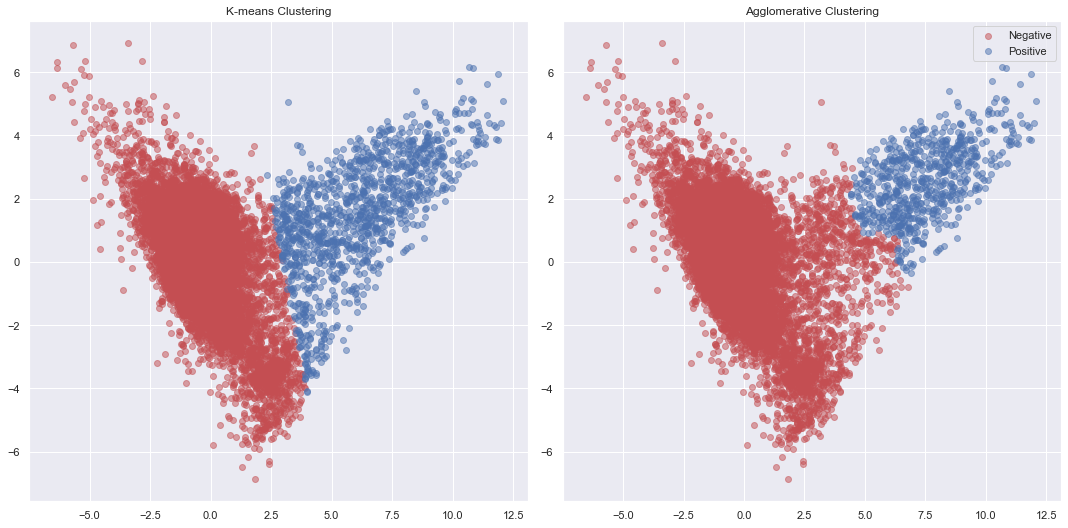

In [35]:
n=2
colors = ['r','b']
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,7.5))

km = KMeans(n_clusters= n , random_state=0)
y_km = km.fit_predict(reduced_data)

for i in range(n):
    ax1.scatter(reduced_data[y_km==i,0], reduced_data[y_km==i,1], c=colors[i], marker='o',alpha=0.5)   
ax1.set_title('K-means Clustering')


ac = AgglomerativeClustering(n_clusters=n, affinity='euclidean', linkage='complete')
y_ac = ac.fit_predict(reduced_data)

for i in range(n):
    ax2.scatter(reduced_data[y_ac==i,0], reduced_data[y_ac==i,1], c=colors[i], marker='o',alpha=0.5)
ax2.set_title('Agglomerative Clustering')
# Put a legend below current axis
plt.legend(["Negative","Positive"])
    
plt.tight_layout()

plt.show()


In [36]:
print("--- %s minutes ---" % (round(time.time()/60 - start_time/60,2)))

--- 10.85 minutes ---
